In [1]:
import os
import random
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
# os.enviorn['PYTHONHASHSEED'] = '0'


Bad key "text.kerning_factor" on line 4 in
C:\Users\44nas\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
x = np.linspace(0,10)


In [3]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    
set_seeds()

In [4]:
y = x + np.random.standard_normal(len(x))

In [5]:
reg = np.polyfit(x, y, deg=1)

In [6]:
reg

array([0.94612934, 0.22855261])

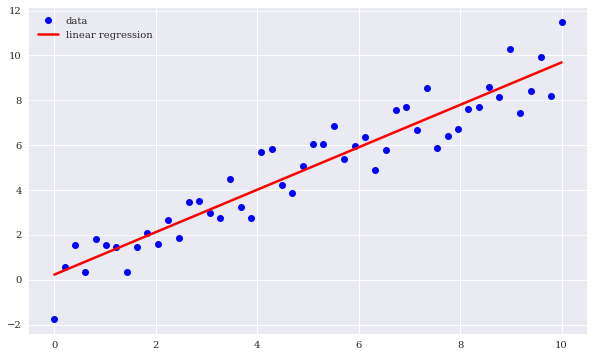

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data')
plt.plot(x, np.polyval(reg, x), 'r', lw=2.5, label='linear regression')
plt.legend(loc=0 )

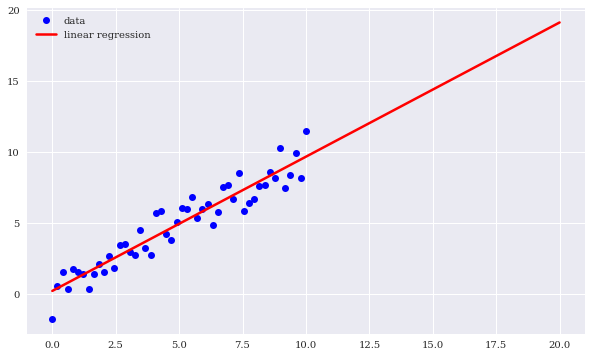

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data')
xn = np.linspace(0, 20)
plt.plot(xn, np.polyval(reg, xn), 'r', lw=2.5, label='linear regression')
plt.legend(loc=0 );

In [9]:
x = np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [10]:
lags = 3

In [11]:
m = np.zeros((lags + 1, len(x) -lags))

In [12]:
m[lags] = x[lags:]
for i in range(lags):
    m[i] = x[i:i - lags]

In [13]:
m.T

array([[ 0.,  1.,  2.,  3.],
       [ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.],
       [ 3.,  4.,  5.,  6.],
       [ 4.,  5.,  6.,  7.],
       [ 5.,  6.,  7.,  8.],
       [ 6.,  7.,  8.,  9.],
       [ 7.,  8.,  9., 10.],
       [ 8.,  9., 10., 11.]])

In [14]:
reg = np.linalg.lstsq(m[:lags].T, m[lags], rcond=None)[0]
reg

array([-0.66666667,  0.33333333,  1.33333333])

In [15]:
np.dot(m[:lags].T, reg)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

# Predicting Index Levels

In [16]:
import pandas as pd

In [17]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv', 
                  index_col= 0, parse_dates=True).dropna()
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
AAPL.O    2516 non-null float64
MSFT.O    2516 non-null float64
INTC.O    2516 non-null float64
AMZN.O    2516 non-null float64
GS.N      2516 non-null float64
SPY       2516 non-null float64
.SPX      2516 non-null float64
.VIX      2516 non-null float64
EUR=      2516 non-null float64
XAU=      2516 non-null float64
GDX       2516 non-null float64
GLD       2516 non-null float64
dtypes: float64(12)
memory usage: 255.5 KB


In [18]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [19]:
symbol = 'EUR='

In [20]:
data = pd.DataFrame(raw[symbol])

data.rename(columns = {symbol: 'price'}, inplace=True)

data.head()

,price
Date,
2010-01-04,1.4411
2010-01-05,1.4368
2010-01-06,1.4412
2010-01-07,1.4318
2010-01-08,1.4412


In [21]:
lags = 5

In [22]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['price'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)

In [23]:
reg = np.linalg.lstsq(data[cols], data['price'], rcond=None)[0]
reg

array([ 0.98635864,  0.02292172, -0.04769849,  0.05037365, -0.01208135])

In [24]:
data['perdiction'] = np.dot(data[cols], reg)


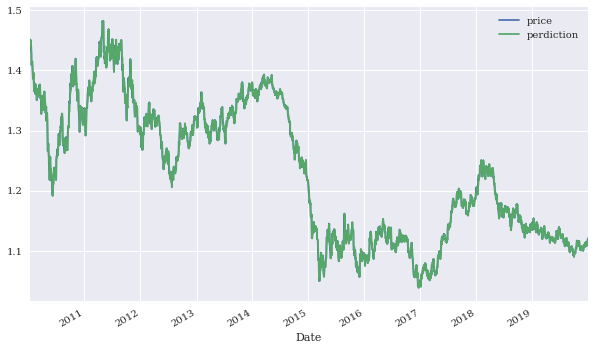

In [25]:
data[ [ 'price', 'perdiction'] ].plot(figsize=(10, 6))

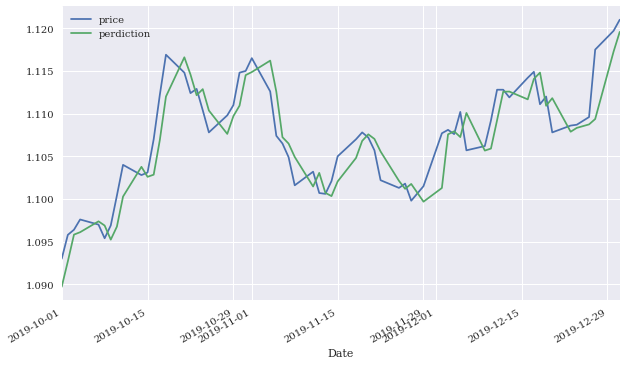

In [26]:
data[['price', 'perdiction']].loc['2019-10-1':].plot(figsize=(10, 6))

# ========= 
# Perdicting Furtre Returns  #1
# =========  

In [27]:
data['return'] = np.log(data['price'] / data['price'].shift(1))

In [28]:
data.dropna(inplace=True)

In [29]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['return'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)

In [30]:
reg = np.linalg.lstsq(data[cols], data['return'], rcond=None)[0]
reg

array([-0.015689  ,  0.00890227, -0.03634858,  0.01290924, -0.00636023])

In [31]:
data['prediction'] = np.dot(data[cols], reg)

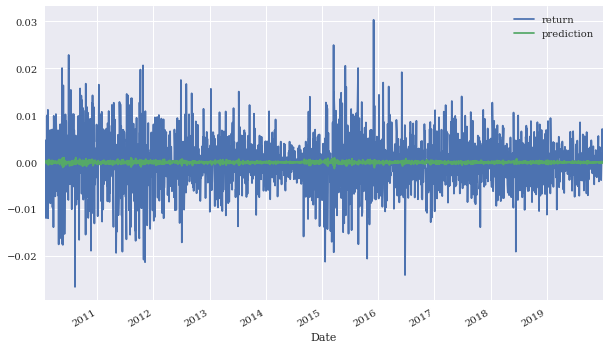

In [32]:
# Orginal
data[[ 'return', 'prediction']].iloc[lags:].plot(figsize=(10, 6))
# something wrog with perdictions

# data[[ 'return']].iloc[lags:].plot(figsize=(10, 6))

In [33]:
hits = np.sign(data['return'] * data['prediction']).value_counts()

In [34]:
hits.values[0] / sum(hits)

0.499001996007984

In [35]:
reg = np.linalg.lstsq(data[cols], np.sign(data['return']),  rcond=None)[0]
reg

array([-5.11938725, -2.24077248, -5.13080606, -3.03753232, -2.14819119])

In [36]:
data['prediction'] = np.sign(np.dot(data[cols], reg))

In [37]:
data['prediction'].value_counts()

 1.0    1300
-1.0    1205
Name: prediction, dtype: int64

In [38]:
hits = np.sign(data['return'] * data['prediction']).value_counts()
hits

 1.0    1301
-1.0    1191
 0.0      13
dtype: int64

In [39]:
hits.values[0] / sum(hits)

0.5193612774451097

### Vectorized Backtesting of Regression-Based Strategy

In [40]:
data.head()

,price,lag_1,lag_2,lag_3,lag_4,lag_5,perdiction,return,prediction
Date,,,,,,,,,
2010-01-20,1.4101,-0.005858,-0.008309,-0.000551,0.001103,-0.001310,1.429671,-0.013874,1.0
2010-01-21,1.4090,-0.013874,-0.005858,-0.008309,-0.000551,0.001103,1.410560,-0.000780,1.0
2010-01-22,1.4137,-0.000780,-0.013874,-0.005858,-0.008309,-0.000551,1.408829,0.003330,1.0
2010-01-25,1.4150,0.003330,-0.000780,-0.013874,-0.005858,-0.008309,1.414101,0.000919,1.0
2010-01-26,1.4073,0.000919,0.003330,-0.000780,-0.013874,-0.005858,1.414653,-0.005457,1.0


In [41]:
data['strategy'] = data['prediction'] * data['return']

data[['return', 'strategy']].sum().apply(np.exp)

return      0.784026
strategy    1.654154
dtype: float64

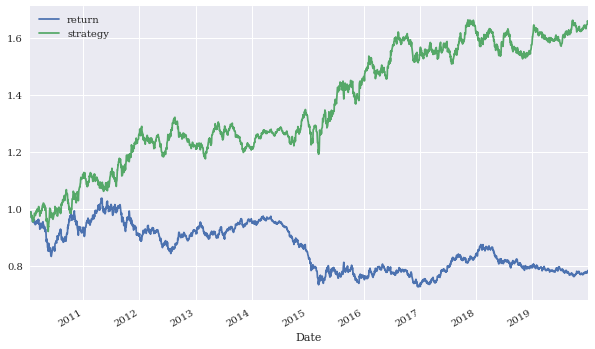

In [42]:
data[['return', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))

# ========= 
# Using Machine Learning for Market Movement Prediction
# ========= 

In [43]:
x = np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [44]:
lags = 3

In [45]:
m = np.zeros((lags + 1, len(x) - lags))

In [47]:
m[lags] = x[lags:]
for i in range(lags):
    m[i] = x[i:i - lags]

In [48]:
print("Hello world")

Hello world
